## Plotting categorical data

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Download the auto MPG dataset
Source: https://github.com/mwaskom/seaborn-data

In [3]:
car_data = pd.read_csv("../Datasets/mpg.csv")
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
car_data.groupby(by=['cylinders']).mean()

,mpg,displacement,horsepower,weight,acceleration,model_year
cylinders,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000
4,29.286765,109.796569,78.281407,2308.127451,16.601471,77.073529
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000
6,19.985714,218.142857,101.506024,3198.226190,16.263095,75.928571
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913


## How do we get more information about the distribution values within each category?

#### The Box Plot

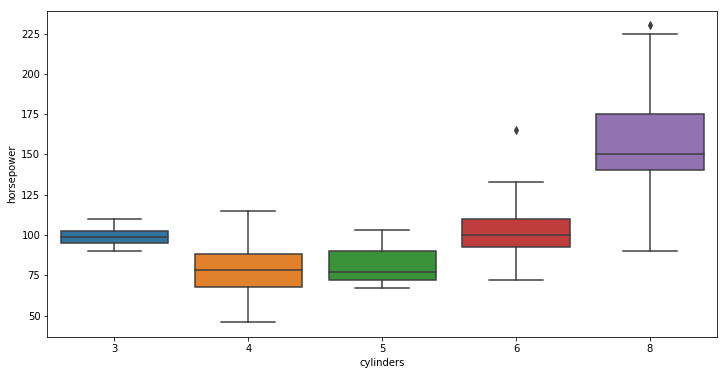

In [4]:
plt.subplots(figsize = (12,6))

sns.boxplot(x = "cylinders",
            y = "horsepower",
            data = car_data)

plt.show()


* There are lines extending above and below the boxplot - called whiskers. Along categories where some data exist that are a little off from the max concentration, some data points are visible.
In boxplot terms, the whiskers extend to points that lie within 1.5 times the interquartile range of the lower and upper quartile. Observations falling outside this margin are displayed independently.

#### The Violin Plot
It's a combination of a boxplot and a KDE curve

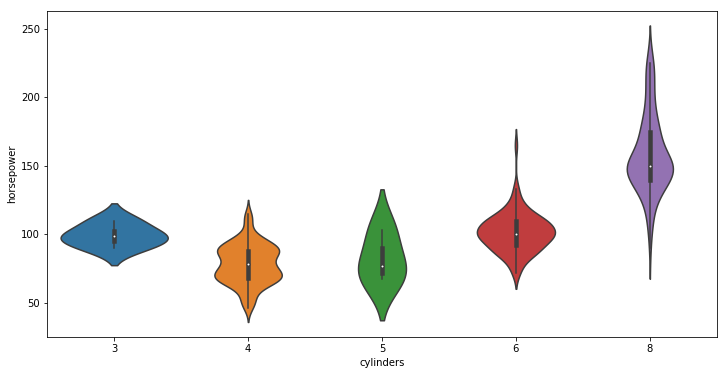

In [5]:
plt.subplots(figsize = (12, 6))

sns.violinplot("cylinders",
               "horsepower",
                data = car_data)

plt.show()

* The name comes from the shape of the graph plotted. We see that this is similar to the box plot, except that the shaded region is enclosed between curves. 
* The representation provides a better description of the values of the distribution.
* Linking this to what we observed while analysing univariate distributions, we see that these curve boundaries correspond to the kernel density estimate
* The quartile range and whisker values are part of the violin itself.

#### Tweaking the KDE curve
Setting the scale as count scales the width of the violins to the number of observations in that bin.
This is in line with our observations so far. There are more cars that are of 4 cylinders.

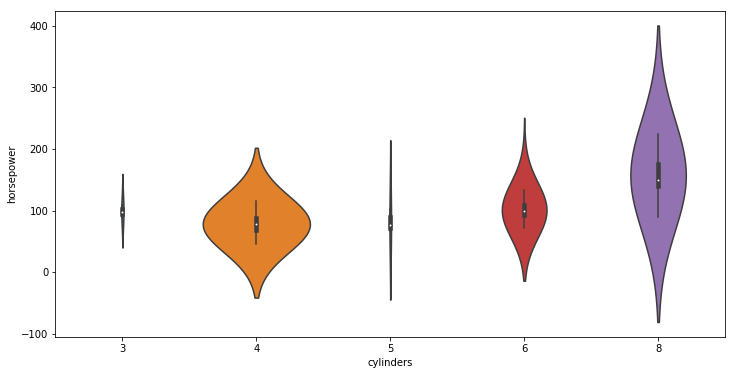

In [6]:
plt.subplots(figsize = (12, 6))

sns.violinplot("cylinders",
               "horsepower", 
                data = car_data,
                bw = 3,
                scale = "count")

plt.show()

#### Further tweaks
* setting the <b>inner</b> attribute to 'sticks' effectively plots a rug plot within the violin (other possible values are 'box', 'quartile', 'point')
* <b>scale</b> will decide the size of the violin. Count scales the violin according to the number of data points. Other options are 'area' and 'width' which means each violin will have the same area or width
* the <b>palette</b> determines which color palette will be used to shade the violins

A list of Matplotlib built-in colormaps can be found on this page:
https://matplotlib.org/users/colormaps.html

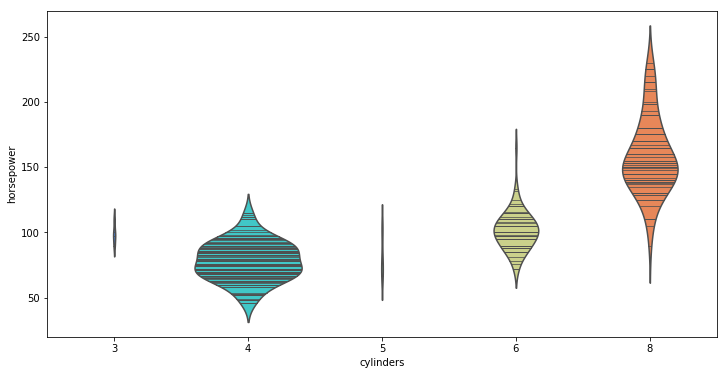

In [7]:
plt.subplots(figsize=(12, 6))

sns.violinplot("cylinders" , 
               "horsepower",
                data = car_data,
                inner = "stick",
                bw = 0.5,
                scale = "count",
                palette = "rainbow")

plt.show()

### Combining plots
Combine the violin plot with a swarm plot which plots a marker for each data point. 

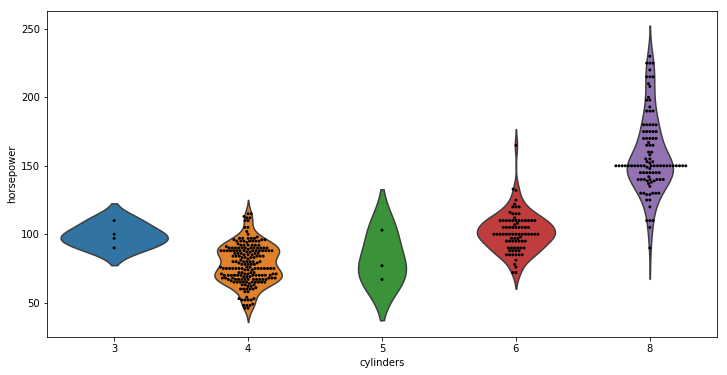

In [8]:
plt.subplots(figsize = (12, 6))

sns.violinplot("cylinders",
               "horsepower",
                data = car_data,
                inner = None)

sns.swarmplot("cylinders", 
              "horsepower",
               data = car_data,
               color = "black", 
               size = 3)

plt.show()

In [9]:
sns.set(style = "whitegrid",
        color_codes = True)

Such plots, where one of the variables of interest is categorical, are best approached by methods specific to categorical plots. Seaborn provides many functions to analyse such data:
* swarmplot() and stripplot() for plots that show each observation at each level of the categorical variable
* boxplot() and violinplot() for abstract representations of each distribution of observations
* barplot() and pointplot() for those that apply statistical estimation to show a measure of central tendency and confidence interval.
* factorplot(), that takes the help of FacetGrid and allows the user to plot across a grid of figure panels, unlike the rest that plot onto a specific matplotlib axis

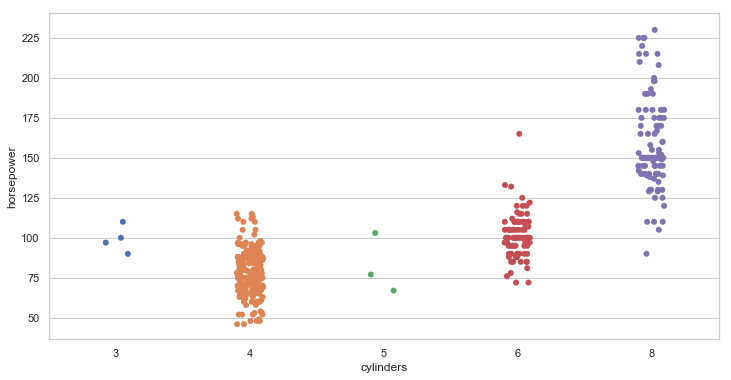

In [10]:
plt.subplots(figsize = (12, 6))

sns.stripplot("cylinders",
              "horsepower",
               data = car_data,
               size = 6)

plt.show()

*We see that stripplot is basically a scatterplot to the case where one variable is categorical. It is clear that points overlap though.* <br>
Let us try to adjust the data points along the categorical axis.

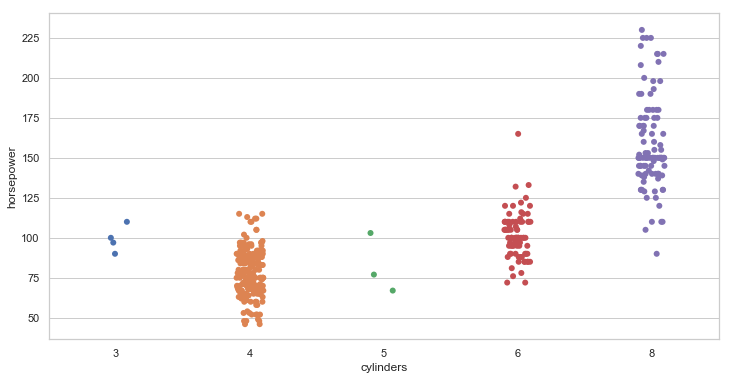

In [11]:
plt.subplots(figsize = (12, 6))

sns.stripplot("cylinders",
              "horsepower",
               data = car_data,
               size = 6,
               jitter = True)

plt.show()

The other way to do this is invoke the swarmplot().

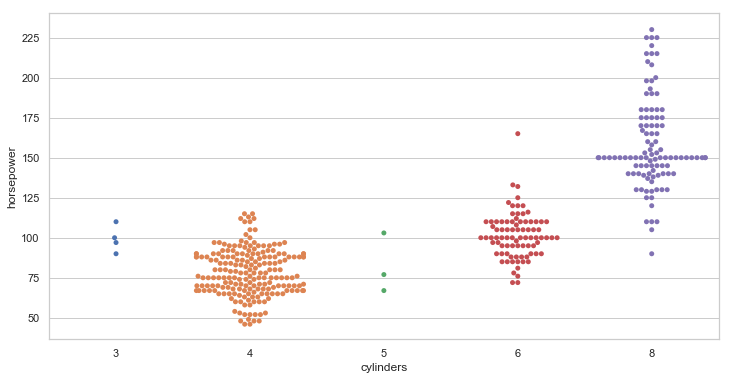

In [12]:
plt.subplots(figsize = (12, 6))

sns.swarmplot("cylinders",
              "horsepower",
               data = car_data)

plt.show()

The swarm plot output is spread out such that overlap is minimum. This is clear when comparing the stripplot with jitter and the swarm plot; the number of points seen is way more in the swarmplot, and is a true measure of the number of samples being considered. The algorithm behind swarm plot is built to function this way.*

Two things are can be understood:
* Colours in the above plot are random
* In a categorical distribution, the categorical values are arranged in ascending order along the axis. If the data is in string format, the values appear in the order specified in the dataframe. 
  * If working with pandas, one could set a default order of categoried from there before importing.
  

#### Colors can be included in the plots to view additional information
In addition to the number of cylinders and horsepower, adding colours can allow us to view details about the country of origin of the automobiles. Colors are best used with categorical values as applying it on continuous data will generate too many different colours which will be hard to distinguish.

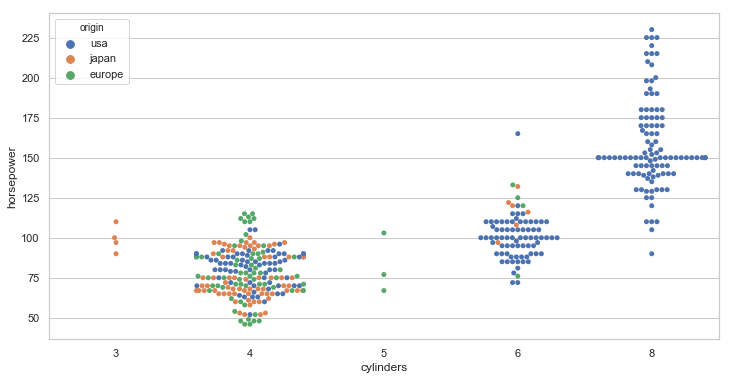

In [13]:
plt.subplots(figsize = (12, 6))

sns.swarmplot("cylinders" ,
              "horsepower" ,
               data = car_data ,
               hue = "origin")

plt.show()

### Statistical estimation within categories
**Plots to show the central tendency of the values in the distribution**

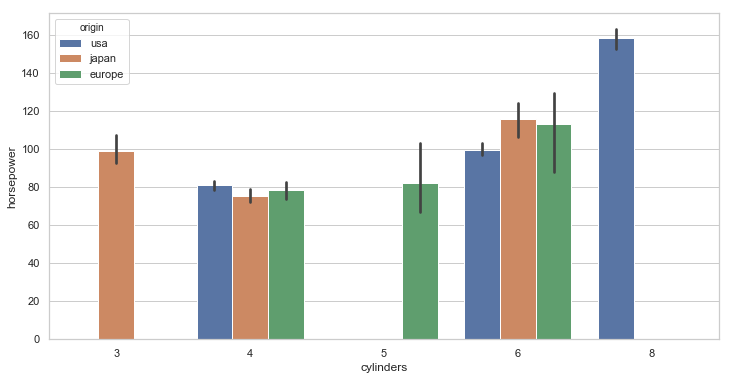

In [14]:
plt.subplots(figsize = (12, 6))

sns.barplot(x = "cylinders" ,
            y = "horsepower" ,
            data = car_data,
            hue = "origin")

plt.show()

We see a bar plot that has taken into account number of cylinders,horsepower and origin for each car under consideration.
For different number of cylinders, we see a set of bar plots that correspond to the various origins, all with a height representing the average horsepower. 

#### The Count Plot
This is similar to a histogram and shows the number of data points in each category

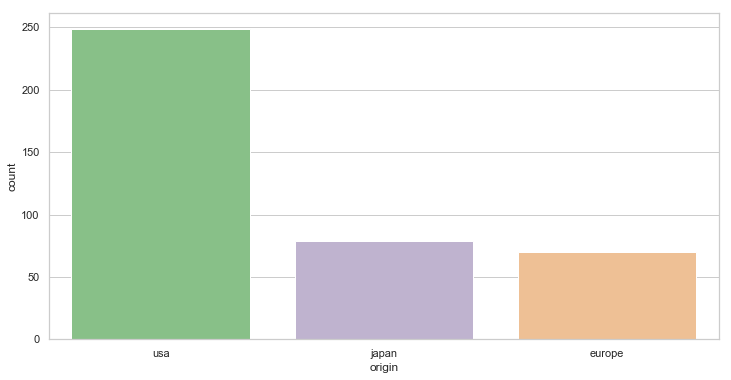

In [15]:
plt.subplots(figsize = (12, 6))

sns.countplot("origin",
              data = car_data,
              palette = "Accent")

plt.show()

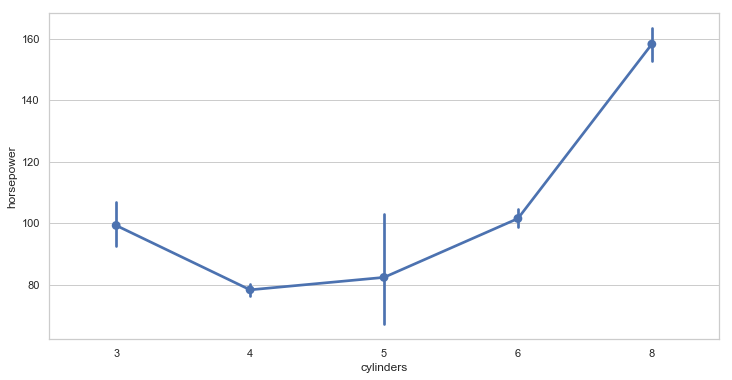

In [16]:
plt.subplots(figsize = (12, 6))

sns.pointplot("cylinders",
              "horsepower",
               data = car_data)

plt.show()

## Drawing multi-panel categorical plots

The Seaborn catplot is a figure-level interface for drawing categorical plots onto a FacetGrid. While working with a FacetGrid, we can generate multiple plots on to the same figure.

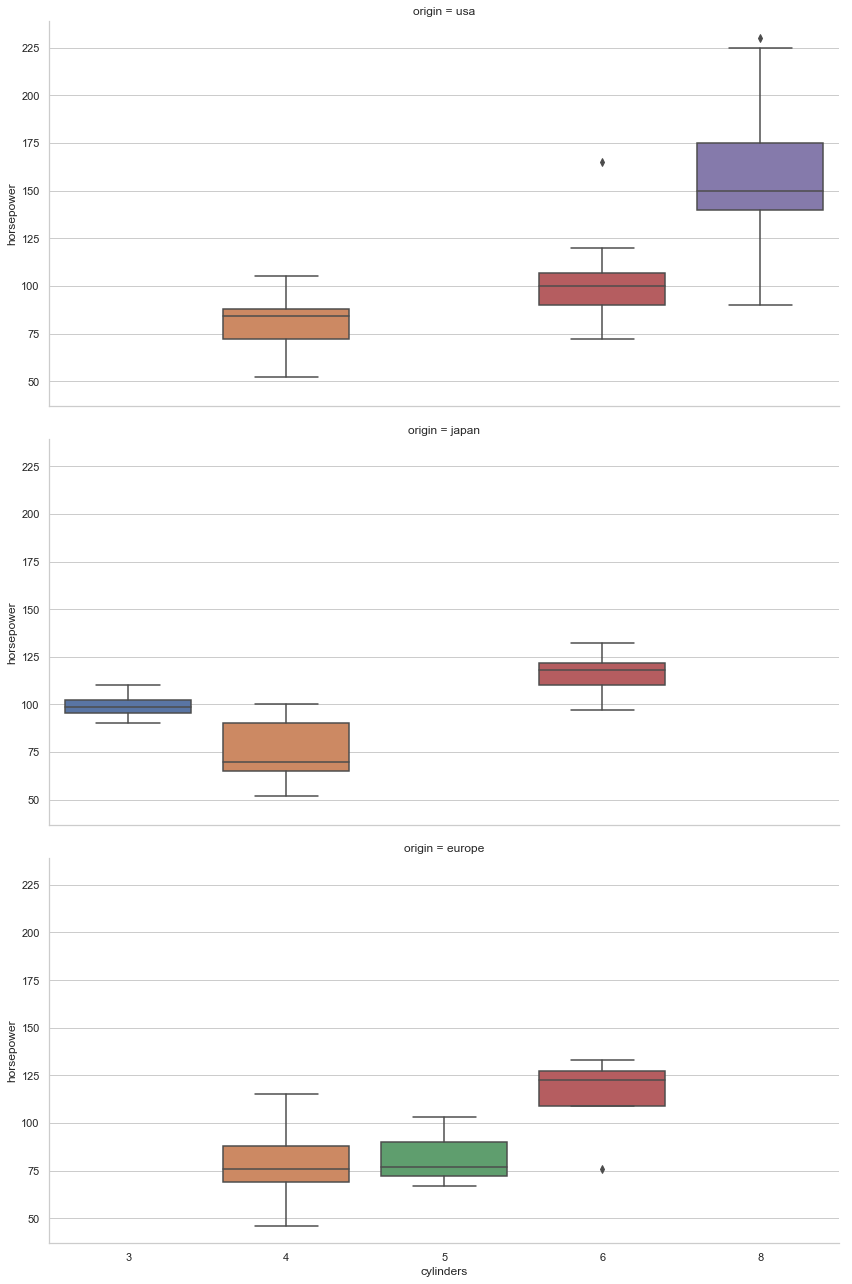

In [17]:
sns.catplot(x = "cylinders",
            y = "horsepower",
            data = car_data,
            row = "origin",
            kind = "box",
            height = 6,
            aspect = 2)

plt.show()

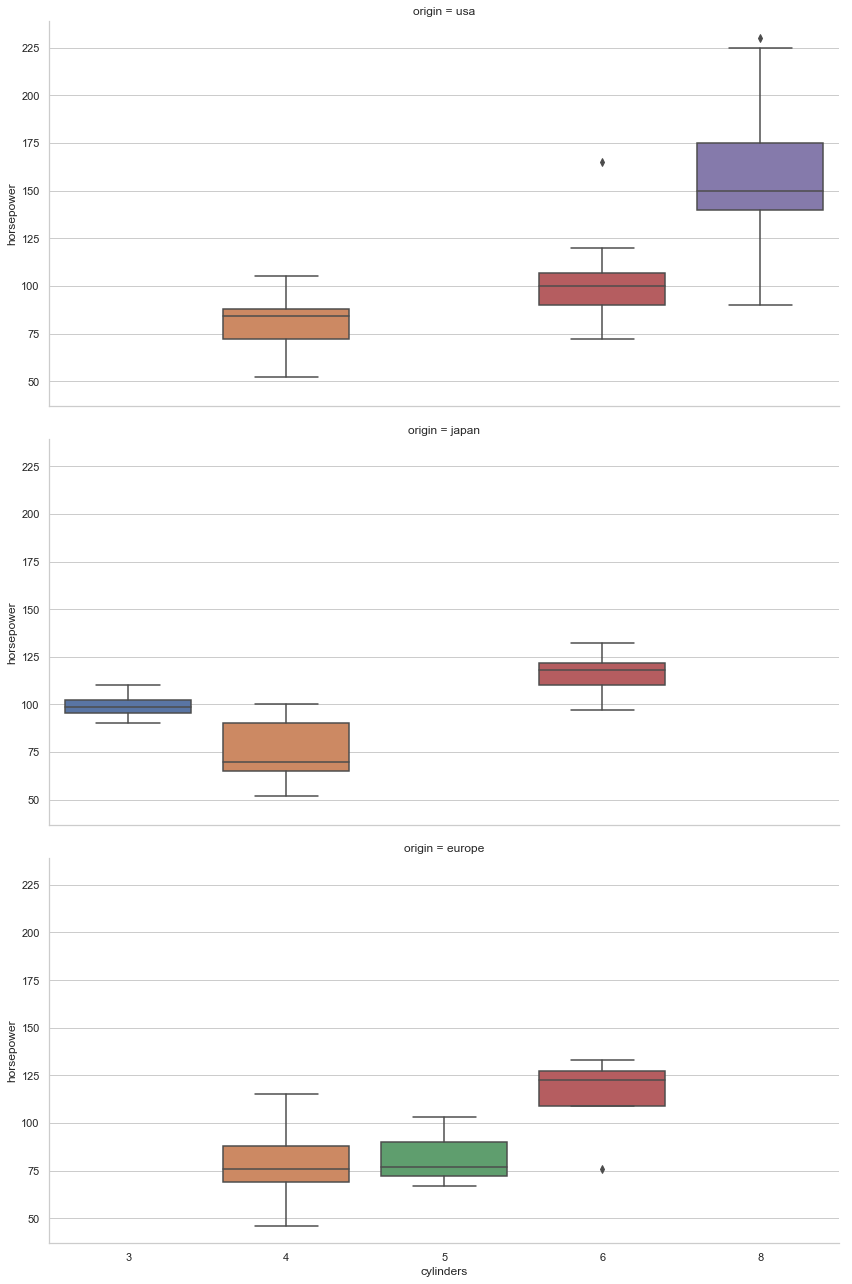

In [18]:
sns.catplot(x = "cylinders",
            y = "horsepower",
            data = car_data,
            row = "origin",
            kind = "box",
            height = 6,
            aspect = 2)

plt.show()